# Week 7 Check In: PCA and Clustering

In [3]:
# imports 
import pandas as pd
import numpy as np
import plotly.express as px
from itertools import product
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

pd.set_option('display.max_columns', None)

In [4]:
clustering_data = pd.read_excel('clean_data.xlsx')

clustering_data_predictors = clustering_data.select_dtypes(include=[np.number]).drop(columns="Unnamed: 0")
clustering_data_response = clustering_data['track_genre']

In [5]:
# mean center the data 
mean_vector = np.mean(clustering_data_predictors, axis=0)
clustering_data_centered = clustering_data_predictors - mean_vector

clustering_data_centered.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,39.759534,1181.437971,0.111431,-0.176051,-4.286616,1.684656,-0.63658,0.055835,-0.29321,-0.171180,0.141812,0.243299,-34.488294,0.067833
1,21.759534,-79874.562029,-0.144569,-0.471051,-4.286616,-8.804344,0.36342,-0.010865,0.59859,-0.171176,-0.115188,-0.204701,-44.916294,0.067833
2,23.759534,-18658.562029,-0.126569,-0.278051,-5.286616,-1.303344,0.36342,-0.031465,-0.11541,-0.171181,-0.099188,-0.351701,-46.073294,0.067833
3,37.759534,-27551.562029,-0.298569,-0.577451,-5.286616,-10.084344,0.36342,-0.050865,0.57959,-0.171111,-0.084188,-0.328701,59.334706,-0.932167
4,48.759534,-30631.562029,0.053431,-0.194051,-3.286616,-1.250344,0.36342,-0.034565,0.14359,-0.171181,-0.133288,-0.304701,-2.456294,0.067833


In [17]:
# KMeans clustering
# set number of clusters equal to the number of unique genres
num_clusters = len(clustering_data_response.unique())
# num_clusters = 3

ss = StandardScaler()
track_ss = ss.fit_transform(clustering_data_centered)
kmeans = KMeans(n_clusters=num_clusters)
y_kmeans = kmeans.fit_predict(track_ss)

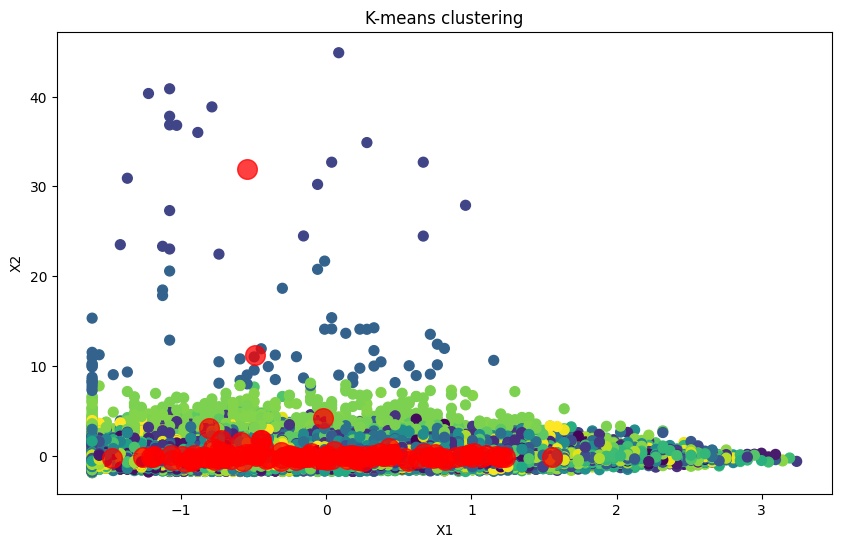

In [18]:
# Visualizing clusters and cluster centers 
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(track_ss[:, 0], track_ss[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-means clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [19]:
# Are genres clustered together?
# Create a dataframe with the cluster labels and the genre
cluster_df = pd.DataFrame({'cluster': y_kmeans, 'genre': clustering_data_response})
cluster_df = cluster_df.sort_values(by='cluster')
cluster_df.head()

,cluster,genre
48171,0,indian
44585,0,heavy-metal
44581,0,heavy-metal
44603,0,heavy-metal
83843,0,synth-pop


In [9]:
# # Agglomerative clustering (takes too long)
# hclust = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
# hclust_labels = hclust.fit(track_ss).labels_

In [10]:
# # Visualize the clusters 
# fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# plt.scatter(track_ss[:, 0], track_ss[:, 1], c=hclust_labels, s=50, cmap='rainbow')
# plt.title('Agglomerative clustering')
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.show()

In [20]:
# Using metrics to evaluate the clustering
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score

In [21]:
#K-means inertia
# from sklearn
# inertia = Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
round(kmeans.inertia_, 1)

374053.9

In [ ]:
#silhouette score for k-means
silhouette_score(track_ss, y_kmeans)